# College Scorecard: Exploratory Data Analysis

At this point, you’ve obtained the dataset for your capstone project, cleaned, and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you’ve learned to explore the data.

Based on your dataset, the questions that interest you, and the results of the visualization techniques that you used previously, you might end up using only a few of the inferential techniques that you’ve learned. Your specific situation determines how much time it’ll take you to complete this project. Talk to your mentor to determine the most appropriate approach to take for your project. You may find yourself revisiting the analytical framework that you first used to develop your proposal questions. It’s fine to refine your questions more as you get deeper into your data and find interesting patterns and answers. Remember to stay in touch with your mentor to remain focused on the scope of your project

Think of the following questions and apply them to your dataset:

Are there variables that are particularly significant in terms of explaining the answer to your project question?

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

What are the most appropriate tests to use to analyse these relationships?


### Stating the Problem:
Can we predict the average student earnings of a college based on features of that college?


### To-Do:
- ~~Double check data is cleaned (nulls addressed and any outlier variables).~~
- ~~Look Correlation between variables.~~
- ~~Check for Log variables (matplotlib, numpy): https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly~~
- ~~PCA study - components can capture 95% of total variance.~~
- ~~Show compact table of correlation with target variable.~~
- ~~Drop duplicative values~~
- Write up explanation of EDA.
- Breakdown final steps for this analysis.


## 0. Imports and FilePathing

In [1]:
## Imports ##
#############
from os import getcwd, path, listdir

from scipy.stats import pearsonr
from scipy.optimize import curve_fit

import numpy as np
from pandas import DataFrame, Timestamp, Series, read_csv, concat, option_context, merge, melt, cut, qcut

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [18,8]
sns.set()

from IPython.display import Markdown, HTML, FileLink

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
## File Pathing ##
##################

#Dataset was collected using included api_call.py file: https://github.com/jeffreysanglin/springboard/blob/master/api_call.py

LOCAL_DIR = getcwd()
DATA_PATH = path.join(LOCAL_DIR, 'cleaned_data.csv')


#Base dataset and dependent variable name.
df = read_csv(DATA_PATH, low_memory=False)
depvar = 'earnings_6yr'

In [3]:
## UDF's ##
###########

def display_all(df,max_rows=1000,max_columns=1000):
    """Display a data frame within a pandas option context.
	
    Parameters
    ----------
	max_rows : int
	    The maximum number of rows to display.

	max_columns : int
	    The maximum number of columns to display.
    """
    with option_context("display.max_rows", max_rows, "display.max_columns", max_columns):
        display(df)
        


## 1. Correlation between variables.
### 1.1 Correlation between independent and dependent variable

latest.admissions.act_scores.midpoint.english
earnings_6yr


/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Admissions - Act_scores - Midpoint - English

##### R^2: 0.31 | p: 0.00%

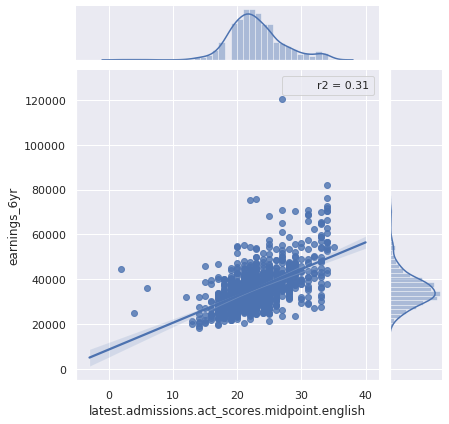

latest.admissions.act_scores.midpoint.math
earnings_6yr


/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Admissions - Act_scores - Midpoint - Math

##### R^2: 0.41 | p: 0.00%

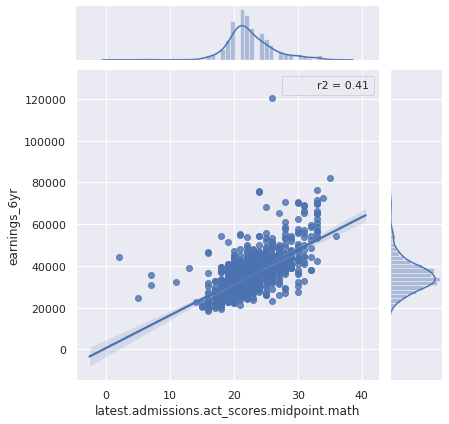

latest.admissions.sat_scores.midpoint.math
earnings_6yr


/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Admissions - Sat_scores - Midpoint - Math

##### R^2: 0.4 | p: 0.00%

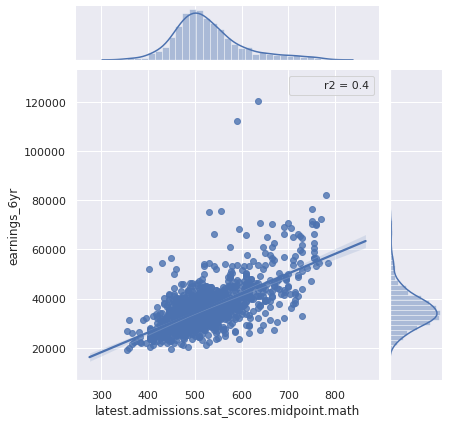

latest.cost.avg_net_price.private
earnings_6yr


/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Cost - Avg_net_price - Private

##### R^2: 0.3 | p: 0.00%

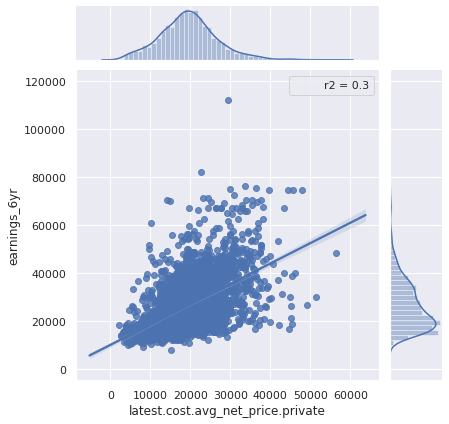

latest.repayment.repayment_cohort.1_year_declining_balance
earnings_6yr


/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Repayment - Repayment_cohort - 1_year_declining_balance

##### R^2: 0.4 | p: 0.00%

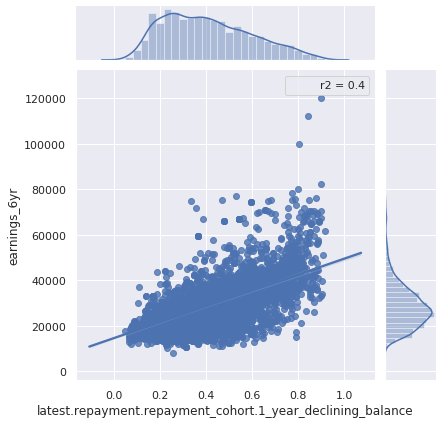

latest.student.share_lowincome.0_30000
earnings_6yr


/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Student - Share_lowincome - 0_30000

##### R^2: 0.44 | p: 0.00%

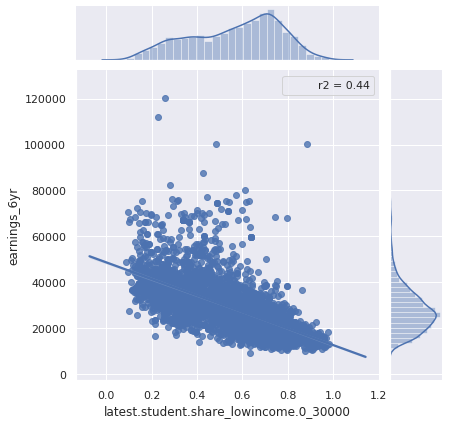

school.faculty_salary
earnings_6yr


/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: School - Faculty_salary

##### R^2: 0.37 | p: 0.00%

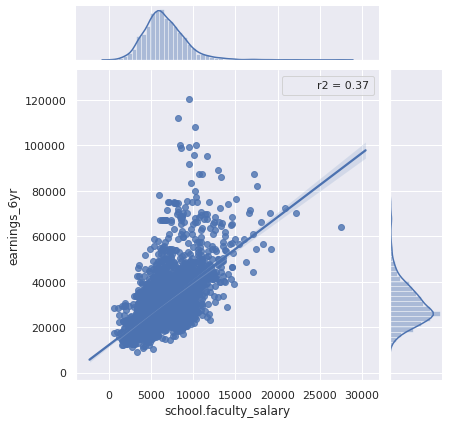

In [5]:
#display(DF.head())
scatterpairs = [[c,depvar] for c in list(df.columns)]
#print(scatterpairs)

def r2(x, y):
    return pearsonr(x, y)[0] ** 2

corr_cols = [
    #positively correlated
    'latest.admissions.act_scores.midpoint.math','latest.admissions.sat_scores.midpoint.math','latest.admissions.act_scores.midpoint.english'
    ,'school.faculty_salary','latest.cost.avg_net_price.private','latest.cost.avg_net_priice.public'
    ,'latest.repayment.repayment_cohort.1_year_declining_balance'
    #negatively correlated
    ,'latest.student.share_lowincome.0_30000'
]
for sp in scatterpairs:
    plt.rcParams['figure.figsize'] = [12,8]
    xcol = sp[0]
    if xcol in corr_cols:
        print(xcol)
        print(depvar)
        ax = sns.jointplot(x=xcol, y=depvar, kind='reg', data=df, stat_func=r2)
        #ax = ax.plot_joint(plt.scatter, color=".5", edgecolor="white",alpha=0.9)
        #ax = ax.plot_marginals(sns.distplot, kde=False)
        #xmean = df.loc[:,xcol].mode(0)
        #print(xmean)
        #not_mean_mask = (df.loc[:,xcol]!=xmean)
        r, p = pearsonr(df.loc[df.loc[:,xcol].notnull(),xcol],df.loc[df.loc[:,xcol].notnull(),depvar])
        #r, p = pearsonr(df.loc[df.loc[:,xcol]!=22.917098,xcol],df.loc[df.loc[:,xcol]!=22.917098,depvar])
        variable_title = ' - '.join([ x.capitalize() for x in xcol.split('.')])
        display(Markdown('#### Scatter: {}'.format(variable_title)))
        display(Markdown('##### R^2: {} | p: {:.2%}'.format(round(r**2,2),p)))
        plt.show()
    else:
        continue

## 2. Log Transformations

/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Student - Demographics - Unemployment

##### R^2: 0.1 | p: 0.00%

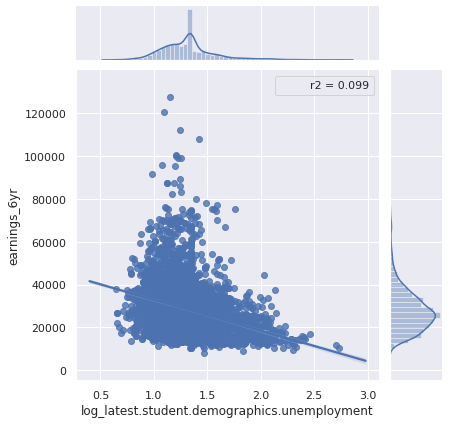

/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Student - Demographics - Poverty_rate

##### R^2: 0.15 | p: 0.00%

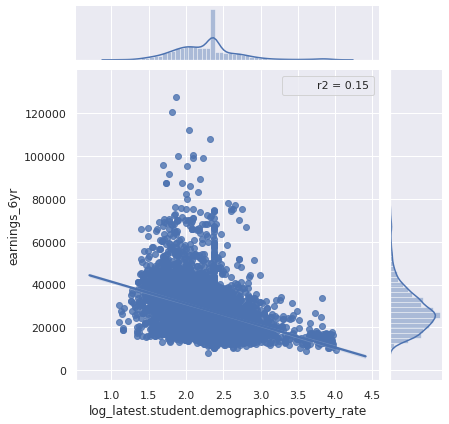

/var/cache/udocker/phoenix-worker/targaryen/python3/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


#### Scatter: Latest - Student - Share_firstgeneration_parents - Middleschool

##### R^2: 0.08 | p: 0.00%

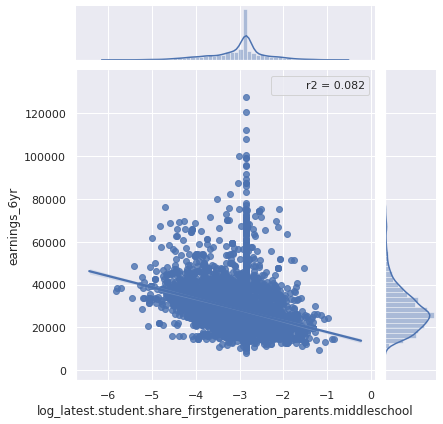

In [6]:
logcols = [
    'latest.student.demographics.unemployment'
    ,'latest.student.demographics.poverty_rate'
    ,'latest.student.share_firstgeneration_parents.middleschool'
]

#polydeg = 1
#for c in logcols:
#    x = df.loc[:,c].copy().values
#    y = df.loc[:,depvar].copy().values
#    z = np.polyfit(np.log(x), y, polydeg)
#    p = np.poly1d(z)
#    _ = plt.plot(x,y, '.', z)
#    plt.show()
#    #z = np.log(x)
#    #print(x)
#    #print(y)
#    #print(z)


for c in logcols:
    colname = 'log_{}'.format(c)
    df.loc[:,colname] = np.log(df.loc[:,c].values)
    ax = sns.jointplot(x=colname, y=depvar, kind='reg', data=df, stat_func=r2)
    #ax = ax.plot_joint(plt.scatter, color=".5", edgecolor="white",alpha=0.9)
    #ax = ax.plot_marginals(sns.distplot, kde=False)
    r, p = pearsonr(df.loc[:,colname],df.loc[:,depvar])
    variable_title = ' - '.join([ x.capitalize() for x in c.split('.')])
    display(Markdown('#### Scatter: {}'.format(variable_title)))
    display(Markdown('##### R^2: {} | p: {:.2%}'.format(round(r**2,2),p)))
    plt.show()

## 3. PCA 

count      5489.000000
mean      28432.592458
std       11223.737561
min        7900.000000
5%        14900.000000
10%       16400.000000
25%       21000.000000
50%       26600.000000
75%       33200.000000
90%       40700.000000
95%       47900.000000
max      127400.000000
Name: earnings_6yr, dtype: float64

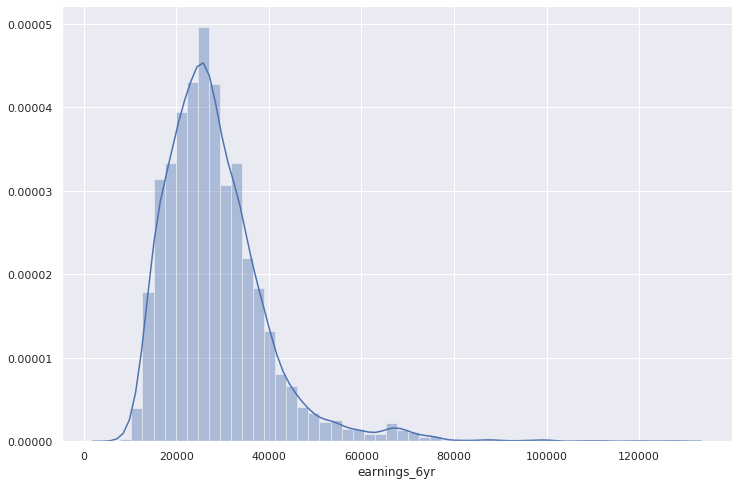

In [7]:
#create bins for depvar
#display(df.head())
#display(df.head())
display(df.loc[:,depvar].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.90,0.95]))

ax = sns.distplot(df.loc[:,depvar])
plt.show()

cats=6
df.loc[:,'earncats'] = qcut(df.loc[:,depvar],q=cats)


In [11]:
#imput nan values
def imputeNulls(x, data, fun):
    """Return a dataframe with imputed nans and an additional boolean column for the existence of nans."""
    #Create boolean null column
    null_col_name = 'null_{}'.format(x)
    data.loc[:,null_col_name] = np.where(data.loc[:,x].isnull(),1,0)
    #Impute values into column
    impnull = fun(data.loc[data.loc[:,x].notnull(),x].values)
    data.loc[:,x] = data.loc[:,x].fillna(impnull)
    return(data)

corr_cols = [
    #positively correlated
    'latest.admissions.act_scores.midpoint.math','latest.admissions.sat_scores.midpoint.math','latest.admissions.act_scores.midpoint.english'
    ,'school.faculty_salary','latest.cost.avg_net_price.private','latest.cost.avg_net_price.public'
    ,'latest.repayment.repayment_cohort.1_year_declining_balance'
    #negatively correlated
    ,'latest.student.share_lowincome.0_30000'
]

for c in corr_cols:
    #print(c)
    df = imputeNulls(c, df,fun=np.mean)

In [12]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
exclcols = [
    'earnings_6yr'
    ,'zip'
]

features = [c for c in list(df.columns) if df.loc[:,c].dtype in ['float64','int64']]

x = df.loc[:,features].values
y = df.loc[:,'earncats'].values

#Standardze features
x = StandardScaler().fit_transform(x)
print(x.shape)

(5489, 190)


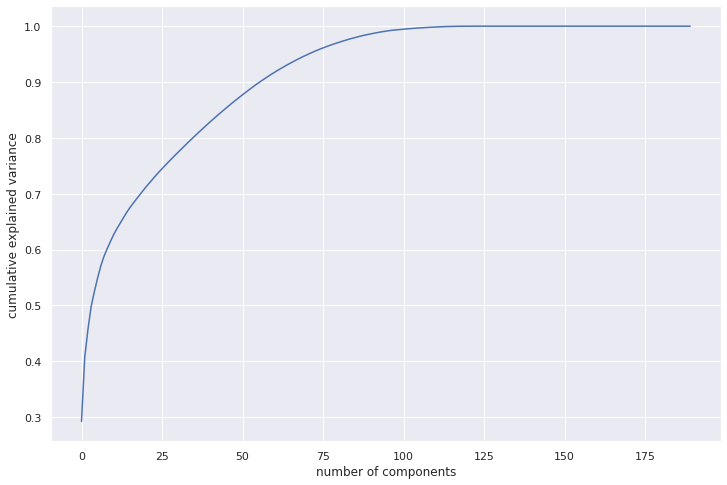

In [13]:
#sklearn features
pca = PCA(n_components=2)
#pca = PCA()
principal_components = pca.fit_transform(x)
colnames = ['principal component {}'.format(1+i) for i in range(2)]
principal_df = DataFrame(data=principal_components, columns=colnames)

pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#print(['{:.2%}'.format(i) for i in pca.explained_variance_ratio_])

#display(principal_df.head())

finaldf = concat([principal_df, df[['earncats']]],axis=1)

#finaldf = pcaPlot(x)

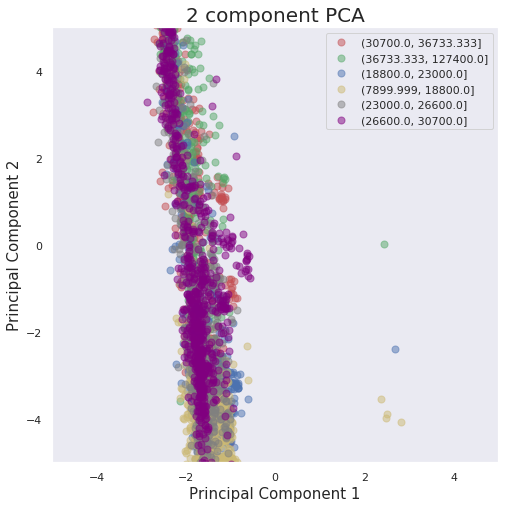

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b','y','grey','purple']
targets = list(finaldf.loc[:,'earncats'].unique())

for target, color in zip(targets,colors):
    indicesToKeep = finaldf['earncats'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               ,alpha=0.5
              )
ax.legend(targets)
ax.grid()

plt.xlim(-5,5)
plt.ylim(-5,5)


plt.show()

### 1.2 Correlation matrix between independent variables

In [15]:
#Pivot table of correlation with target variables.

,id,latest.academics.program_percentage.agriculture,latest.academics.program_percentage.architecture,latest.academics.program_percentage.business_marketing,latest.academics.program_percentage.communication,latest.academics.program_percentage.communications_technology,latest.academics.program_percentage.computer,latest.academics.program_percentage.construction,latest.academics.program_percentage.education,latest.academics.program_percentage.engineering,...,null_school.main_campus,null_school.religious_affiliation,null_school.state_fips,null_school.under_investigation,null_earnings_6yr,log_latest.student.demographics.unemployment,log_latest.student.demographics.poverty_rate,log_latest.student.share_firstgeneration_parents.middleschool,null_school.faculty_salary,null_latest.student.share_lowincome.0_30000
id,1.000000,-0.001540,-0.000959,-0.001800,-0.001505,0.000569,0.000861,0.000406,-0.003801,-0.002075,...,NaN,0.082747,NaN,NaN,NaN,0.036075,0.049592,0.025240,NaN,0.004606
latest.academics.program_percentage.agriculture,-0.001540,1.000000,0.006111,-0.000675,0.005157,-0.009300,-0.006593,0.009306,0.039489,0.053845,...,NaN,0.033824,NaN,NaN,NaN,-0.069500,-0.044297,-0.094521,NaN,-0.015454
latest.academics.program_percentage.architecture,-0.000959,0.006111,1.000000,-0.007536,0.004961,0.006355,-0.000978,-0.010588,-0.014067,0.083513,...,NaN,0.015816,NaN,NaN,NaN,-0.006619,-0.017973,-0.022911,NaN,-0.006357
latest.academics.program_percentage.business_marketing,-0.001800,-0.000675,-0.007536,1.000000,0.092288,-0.052853,0.176651,-0.081665,0.186642,0.032236,...,NaN,-0.210386,NaN,NaN,NaN,-0.063558,-0.089234,-0.186708,NaN,-0.053195
latest.academics.program_percentage.communication,-0.001505,0.005157,0.004961,0.092288,1.000000,0.015547,-0.024802,-0.053128,0.122006,0.040844,...,NaN,-0.133793,NaN,NaN,NaN,-0.080004,-0.106615,-0.169245,NaN,-0.026459


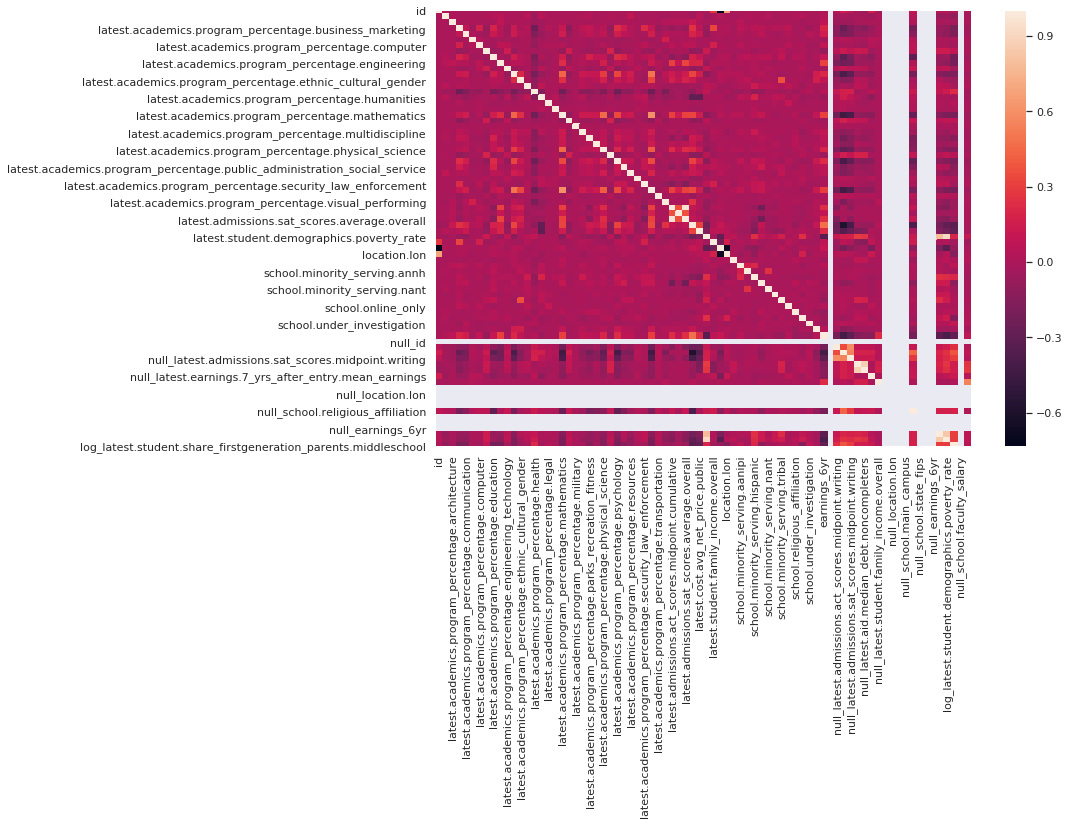

,index,variable,value
41,location.lat,id,-0.732086
3198,id,location.lat,-0.732086
3317,location.lat,location.lon,-0.653310
3240,location.lon,location.lat,-0.653310
4639,latest.aid.loan_principal,null_latest.admissions.admission_rate.overall,-0.577606


/mnt/cephfs/hadoop-compute/phoenix/jeff.anglin/practice/springboard/cap1/corr.csv

In [16]:
#Reduce duplicative features.
remove_cols = [
    'latest.student.share_firstgeneration_parents.somecollege','latest.repayment.repayment_cohort.1_year_declining_balance'
    ,'school.carnegie_undergrad','latest.earnings.7_yrs_after_entry.mean_earnings','school.main_campus'
    ,'latest.student.share_lowincome.0_30000','latest.aid.median_debt.first_generation_students'
    ,'latest.aid.median_debt.first_generation_students','latest.aid.median_debt.non_first_generation_students'
    ,'latest.aid.median_debt.female_students','latest.student.share_firstgeneration'
    ,'latest.aid.median_debt.male_students','latest.student.share_firstgeneration_parents.highschool'
    ,'latest.academics.program_percentage.biological','school.degrees_awarded.highest','latest.student.share_firstgeneration_parents.highschool'
    ,'latest.cost.avg_net_price.private','latest.student.share_independent_students','latest.academics.program_percentage.history'
    ,'latest.admissions.admission_rate.overall','latest.admissions.sat_scores.midpoint.writing','latest.admissions.sat_scores.midpoint.math'
    ,'latest.admissions.act_scores.midpoint.math'
    ,'latest.admissions.sat_scores.midpoint.critical_reading','latest.admissions.admission_rate.overall'
    ,'latest.academics.program_percentage.personal_culinary','latest.student.share_firstgeneration_parents.middleschool'
    ,'latest.academics.program_percentage.theology_religious_vocation','latest.academics.program_percentage.language'
    ,'latest.student.retention_rate.four_year.full_time','school.faculty_salary','latest.aid.median_debt.noncompleters'    
    ,'latest.admissions.act_scores.midpoint.english','latest.student.family_income.independent_students'
    ,'latest.student.demographics.unemployment','latest.aid.median_debt.completers.overall','school.carnegie_basic'
    ,'latest.student.family_income.dependent_students','latest.completion.completion_rate_4yr_150nt'
    ,'null_school.carnegie_undergrad','null_school.men_only','null_school.women_only','null_school.online_only'
    ,'null_school.minority_serving.aanipi','null_school.minority_serving.hispanic'
    ,'null_school.minority_serving.historically_black','null_school.minority_serving.nant'
    ,'null_school.minority_serving.nant','null_school.minority_serving.hispanic','null_school.minority_serving.annh'
    ,'null_school.minority_serving.aanipi','null_school.minority_serving.predominantly_black'
    ,'null_latest.academics.program_percentage.communication','null_latest.academics.program_percentage.family_consumer_science','null_latest.academics.program_percentage.agriculture'
    ,'null_latest.academics.program_percentage.architecture','null_latest.academics.program_percentage.biological','null_latest.academics.program_percentage.resources'
    ,'null_latest.academics.program_percentage.business_marketing','null_latest.academics.program_percentage.communications_technology','null_latest.academics.program_percentage.engineering'
    ,'null_latest.academics.program_percentage.construction','null_latest.academics.program_percentage.education'
    ,'null_latest.academics.program_percentage.engineering_technology','null_latest.academics.program_percentage.visual_performing','null_latest.academics.program_percentage.english'
    ,'null_latest.academics.program_percentage.transportation','null_latest.academics.program_percentage.health','null_latest.academics.program_percentage.computer'
    ,'null_latest.academics.program_percentage.humanities','null_latest.academics.program_percentage.social_science','null_latest.academics.program_percentage.precision_production'
    ,'null_latest.academics.program_percentage.history','null_latest.academics.program_percentage.language','null_latest.academics.program_percentage.theology_religious_vocation'
    ,'null_latest.academics.program_percentage.legal','null_latest.academics.program_percentage.ethnic_cultural_gender','null_latest.academics.program_percentage.library'
    ,'null_latest.academics.program_percentage.mathematics','null_latest.academics.program_percentage.military','null_latest.academics.program_percentage.multidiscipline'
    ,'null_latest.academics.program_percentage.parks_recreation_fitness','null_latest.academics.program_percentage.personal_culinary','null_latest.academics.program_percentage.philosophy_religious'
    ,'null_latest.academics.program_percentage.physical_science','null_latest.academics.program_percentage.security_law_enforcement','null_latest.academics.program_percentage.mechanic_repair_technology'
    ,'null_school.carnegie_basic','null_school.minority_serving.tribal','null_latest.cost.avg_net_price.private','null_latest.cost.avg_net_price.public'
    ,'null_latest.student.retention_rate.four_year.full_time','null_latest.completion.completion_rate_4yr_150nt'
    ,'null_latest.student.share_firstgeneration_parents.somecollege'
    ,'null_latest.student.demographics.unemployment'
    ,'null_latest.aid.median_debt.non_first_generation_students'
    ,'null_latest.student.demographics.poverty_rate'
    ,'null_latest.aid.median_debt.first_generation_students'
    ,'null_latest.aid.median_debt.female_students'
    ,'null_latest.student.family_income.dependent_students'
    ,'null_latest.aid.median_debt.male_students'
    ,'null_latest.academics.program_percentage.public_administration_social_service'
    ,'null_latest.student.share_firstgeneration'
    ,'null_latest.academics.program_percentage.psychology'
    ,'null_latest.academics.program_percentage.science_technology'
    ,'null_latest.academics.program_percentage.science_technology'
    ,'null_latest.student.family_income.independent_students'
    ,'null_latest.academics.program_percentage.public_administration_social_service'
    ,'null_latest.academics.program_percentage.psychology'
    ,'null_latest.admissions.sat_scores.average.overall'
    ,'null_latest.admissions.sat_scores.midpoint.critical_reading'
    ,'null_latest.admissions.sat_scores.midpoint.math'
    ,'null_latest.admissions.sat_scores.average.overall'
    ,'null_latest.student.family_income.dependent_students'
    ,'null_latest.student.share_independent_students'
    ,'null_latest.student.family_income.independent_students'
    ,'null_latest.student.share_independent_students'
    ,'null_latest.admissions.sat_scores.average.overall'
    ,'null_latest.admissions.act_scores.midpoint.cumulative'
    ,'null_school.carnegie_basic'
    ,'null_school.minority_serving.tribal'
    ,'null_latest.student.share_firstgeneration_parents.middleschool'
    ,'null_latest.student.share_firstgeneration_parents.highschool'
    ,'null_latest.admissions.sat_scores.midpoint.critical_reading'
    ,'null_latest.admissions.sat_scores.midpoint.math'
    ,'null_latest.admissions.act_scores.midpoint.math'
    ,'null_latest.admissions.act_scores.midpoint.english'
    ,'null_school.carnegie_basic'
    ,'null_latest.repayment.repayment_cohort.1_year_declining_balance'
    ,'null_latest.aid.loan_principal'
    ,'null_latest.admissions.act_scores.midpoint.english'
    ,'null_latest.admissions.sat_scores.midpoint.critical_reading'
    ,'null_latest.admissions.sat_scores.midpoint.critical_reading'
    ,'null_latest.admissions.act_scores.midpoint.math'
    ,'null_latest.admissions.sat_scores.midpoint.math'
    ,'null_latest.admissions.act_scores.midpoint.english'
    ,'null_latest.admissions.sat_scores.midpoint.math'
    ,'null_latest.admissions.act_scores.midpoint.math'
    ,'null_school.minority_serving.tribal'
    ,'null_latest.academics.program_percentage.psychology'
    ,'null_latest.academics.program_percentage.public_administration_social_service'
    ,'null_school.minority_serving.tribal'
    ,'null_school.minority_serving.tribal'
    ,'null_latest.academics.program_percentage.science_technology'
    ,'null_school.carnegie_basic'
    ,'null_latest.academics.program_percentage.psychology'
    ,'null_school.carnegie_basic'
    ,'null_latest.academics.program_percentage.science_technology'
    ,'null_school.carnegie_basic'
    ,'null_latest.academics.program_percentage.public_administration_social_service'
    ,'null_latest.admissions.sat_scores.average.overall'
    ,'null_latest.admissions.act_scores.midpoint.english'
    ,'null_latest.admissions.act_scores.midpoint.math'
    ,'null_latest.admissions.sat_scores.average.overall'
    ,'null_latest.admissions.act_scores.midpoint.cumulative'
    ,'null_latest.admissions.sat_scores.midpoint.critical_reading'
    ,'null_latest.admissions.act_scores.midpoint.cumulative'
    ,'null_latest.admissions.sat_scores.midpoint.math'
    ,'null_latest.admissions.act_scores.midpoint.english'
    ,'null_latest.admissions.act_scores.midpoint.cumulative'
    ,'null_latest.admissions.act_scores.midpoint.cumulative'
    ,'null_latest.admissions.act_scores.midpoint.math'
]

dedupedf = df.drop(columns=remove_cols)
#nullcols = [c[5:] for c in list(df.columns)]
df_corr = dedupedf.corr(method='pearson').drop(index='Unnamed: 0',columns=['Unnamed: 0'])
display(df_corr.head())
sns.heatmap(df_corr)
plt.show()

df_corr = df_corr.reset_index()
df_corr = melt(df_corr, id_vars='index')
df_corr = df_corr.loc[(df_corr.loc[:,'index']!=df_corr.loc[:,'variable'])]

corr_mask = (df_corr.loc[:,'value']<-0.3)|(df_corr.loc[:,'value']>0.3)
df_corr = df_corr.loc[corr_mask].sort_values(by='value',ascending=True)
nullcolmask = (~df_corr.loc[:,'index'].str.contains('null_'))&(~df_corr.loc[:,'variable'].str.contains('null_'))
#df_corr = df_corr.loc[nullcolmask].sort_values(by='value',ascending=True)
logcolmask = (~df_corr.loc[:,'index'].str.contains('log_')) & (~df_corr.loc[:,'variable'].str.contains('log_'))
df_corr = df_corr.loc[logcolmask].sort_values(by='value',ascending=True)

display(df_corr.head())
df_corr.to_csv('./corr.csv',index=True)
display(FileLink('./corr.csv'))

dedupedf.to_csv('./post_eda.csv')
#ax = sns.heatmap(df_corr)
#plt.show()

## 2.0 EDA Report

I. What we looked at
II. What it taught us about the data set
    i. Features Correlated with Target variable (6yr Earnings)
    ii.Duplicative Features
III. Additional cleaning steps
    i. Deduping correlated features.


For this mini-project, I explored the relationships between the target variable and independent variables as well as each other. I also constructed a principle component analysis. After the correlation analysis and PCA I removed duplicative features.

### Learnings
Of all the features, a few stood out as the most strongly correlated with our target variable (6yr Earnings):
1. **Latest.Student.Share_lowincome.0_30000** (r^2 = 0.44): This feature was negatively correlated with our target variable, suggesting that as schools' percent of low income students are higher, graduates' 6 yr earnings were lower.
2. **Latest.Admissions.act_scores.Midpoint.Math** (r^2 = 0.41): This feature was positively correlated with target varirable. This suggests that as schools' ACT Math scores were higher, graduates' 6 yr earnings were higher as well.
3. **Latest.Repayment.Repayment_cohort.1_year_declining_balance** (r^2 = 0.40: This feature was positively correlated. This suggests that as schools' percent of graduates with declining loan balances 1yr after graduation is higher, graduates' 6 yr earnings are also higher.

Each of these relatioinships were statistically significant (resulting pvalues were all < 0.01%).

After conducting the PCA, it became apparent that many of the independent variables were duplicative. I used a correlation matrix to determine which variables were strongly correlated with each other and removed the duplicative columns.

### Next Steps
Based on this EDA and the problem statement, I will use a linear regressoin to model the data and yield further insights. All of our variables in this dataset have been transformed into numeric values and can be easily normalized for the regression. Additionally, some relationships between the dependent and independent variables can already be seen.
